In [1]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"Number of datasets: {len(all_datasets)}")
print(f"first 10: {all_datasets[:10]}")

/var/folders/k2/fbzjm6cn4_1_7pdkyg78h17m0000gn/T/ipykernel_8185/3481971008.py:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


Number of datasets: 99012
first 10: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [2]:
from datasets import load_dataset
# load emotion datasets

emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [4]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [5]:
train_ds.column_names

['text', 'label']

In [6]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [7]:
import pandas as pd

emotions.set_format("pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
def label_to_text(row):
    return emotions["train"].features["label"].int2str(row)

df['label_name'] = df['label'].apply(label_to_text)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Text(0.5, 1.0, 'Frequency of each emotion')

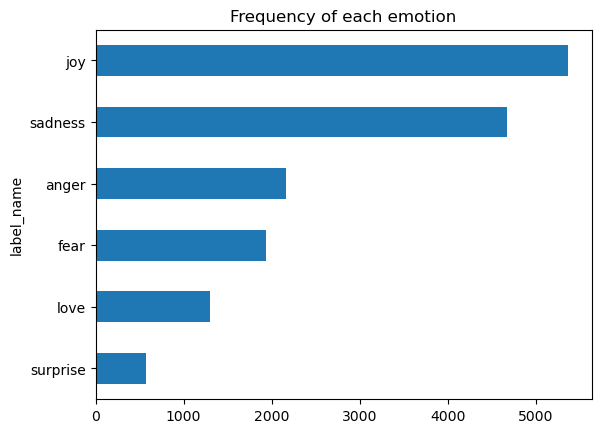

In [9]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of each emotion")

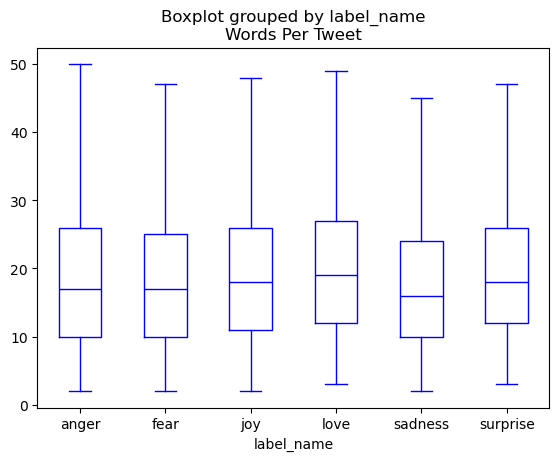

In [10]:
# 트윗 길이 확인

df["Words Per Tweet"] = df["text"].apply(lambda x: len(x.split()))
df.boxplot(column="Words Per Tweet", by="label_name", grid=False, showfliers=False, color="blue")
plt.show()

In [11]:
emotions.reset_format()

### 2. Tokenizer

In [12]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}
[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [13]:
categorical_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0, 1, 2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [14]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [15]:
## one-hot encoding

import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
on_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))

In [16]:
print(f"토큰 {tokenized_text[0]}")
print(f"텐서 인덱스 {input_ids[0]}")
print(f"원-핫 인코딩 {on_hot_encodings[0]}")

토큰 T
텐서 인덱스 5
원-핫 인코딩 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 2.2.2. word tokenization

In [17]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### 2.2.3. subword tokenization

In [18]:
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [19]:
# 수동
# from transformers import DistilBertTokenizer
# distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [20]:
encoded_text = tokenizer(text)
print(encoded_text)
tokens = tokenizer.convert_ids_to_tokens(encoded_text["input_ids"])
print(tokens)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [21]:
print(f"어휘 사전 크기: {tokenizer.vocab_size}")
print(f"모델 최대 문맥 크기: {tokenizer.model_max_length}")
print(f"패딩 토큰 ID: {tokenizer.pad_token_id}")
print(f"패딩 토큰: {tokenizer.pad_token}")
print(f"정방향 패스 {tokenizer.model_input_names}")


어휘 사전 크기: 30522
모델 최대 문맥 크기: 512
패딩 토큰 ID: 0
패딩 토큰: [PAD]
정방향 패스 ['input_ids', 'attention_mask']


### 2.2.4. 전체 데이터셋 토큰화

In [22]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)
print(train_ds[0])
print(train_ds[1])

print(tokenize(train_ds[:2]))

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [23]:
# hide_output
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=16)
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [24]:
## 2.3 텍스트 분류 모델 훈련

In [25]:
# 사전 훈련된 모델 사용하기
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
# device = 'cpu'

In [26]:
# 마지막 은닉 상태 추출
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [27]:
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0'), hidden_states=None, attentions=None)


In [28]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [29]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {last_hidden_state[:, 0, :]}

In [30]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

AttributeError: 'list' object has no attribute 'to'

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) if torch.is_tensor(v) else v for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {last_hidden_state[:, 0, :]}

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [ ]:
emotions_encoded